# MNIST Digit recognition 

In this notebook we will look at the MNIST digits dataset and create a Convoluted Neural Network.

Above every code block the purpose of the block is described.




The following block sets some environment variables. To limit warnings.

In [188]:
%env CUDA_VISIBLE_DEVICES=""
%env TF_CPP_MIN_LOG_LEVEL="5"

env: CUDA_VISIBLE_DEVICES=""
env: TF_CPP_MIN_LOG_LEVEL="5"


We read in some python libraries:
* Numpy
* Matplotlib
* Tensorflow
* Keras

In [189]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical



We read in the data from MNIST (available in Keras) and split into train and test sets.

In [27]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

We enable matplotlib to show images in this notebook.

In [28]:
%matplotlib inline


We show the 35th image in the dataset.

5


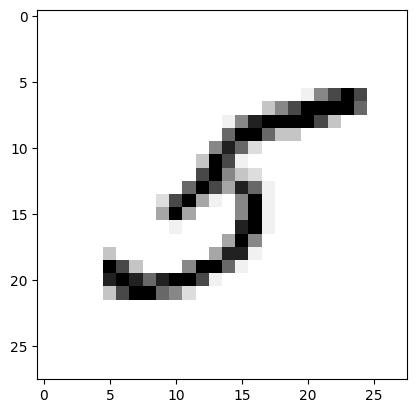

In [29]:
image_index = 35
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

We print the sizes (and shape) of the train and test sets.

In [30]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


We show which digits are in the beginning of the train set, upto and including the 35th digit.

In [31]:
print(y_train[:image_index + 1])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5]


We set the image dimensions and then reshape the images in the train and test set to this size.

In [32]:
# save input image dimensions
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)


As all values in images are between 0 and 255 and we want to work with numbers between 0 and 1, we scale all values by dividing by 255.

In [33]:

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

We convert the y values (the label of the digit) to a categorical variable.

In [34]:
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

We import the different kinds of layers to use in Keras from the package.

In [35]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


We start a model as sequential (i.e. a stack of different kinds of layers). 
And we add the first layer, which is a Conv2D layer.
As activation we use 'relu' (rectified linear units).

In [36]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(img_rows, img_cols, 1)))

We add another Conv2D layer and a pooling layer:

In [37]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

We add a Dropout layer to randomly drop 25% of the units to prevent overfitting.

In [38]:
model.add(Dropout(0.25))

We convert the previous hidden layer into a 1D array using a Flatten layer.

In [39]:
model.add(Flatten())

We create a Dense layer. This layer is similar to a traditional neural network (all to all).

We again add a Dropout layer and drop 25% of all units.

And then another Dense layer which does the final classification into 10 classes.

In [40]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Print the model:

In [41]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

Import a tool to show the model in another form:

In [42]:
from tensorflow.keras.utils import plot_model


Use the imported plot_model to show the created model.

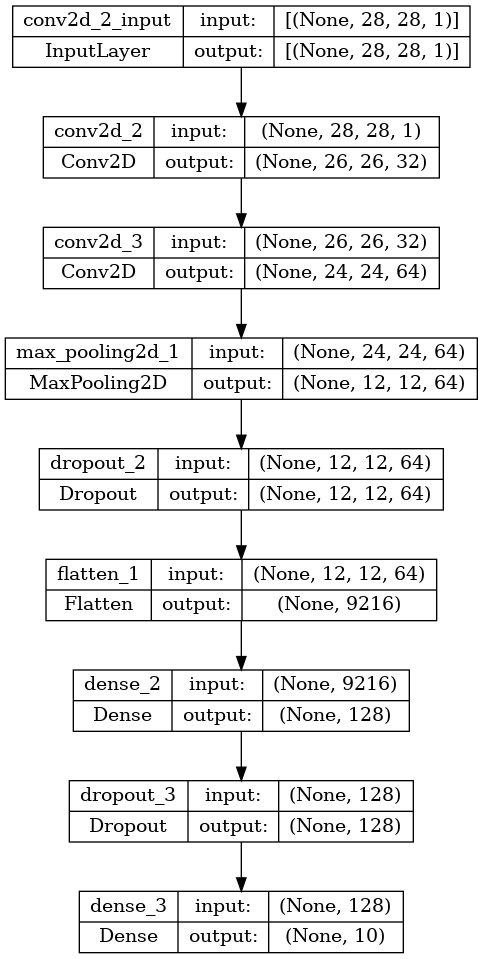

In [43]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

With the library 'visualkeras' we can visualize the model:

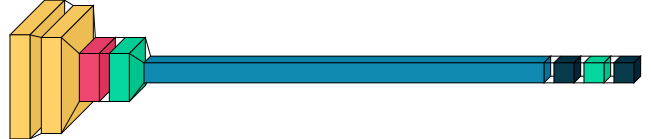

In [44]:
import visualkeras
visualkeras.layered_view(model)

Also using a legend to show the types of layers.

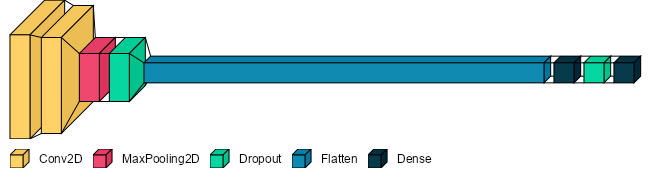

In [45]:
visualkeras.layered_view(model, legend=True) # without custom font
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font) # selected font

Or without the 3D effects.

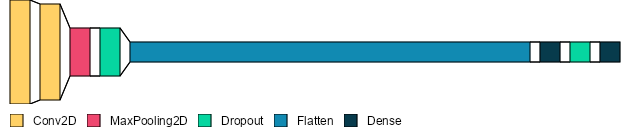

In [46]:
visualkeras.layered_view(model, legend=True, font=font, draw_volume=False)


We 'compile' the model. Ready to start training.

In [49]:
model.compile(loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

We train the model for 10 epochs with batches of 128 images.

In [50]:
batch_size = 128
epochs = 10

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save("test_model.h5")

Epoch 1/10


2023-03-17 12:31:52.539080: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 54s 113ms/step - loss: 0.2413 - accuracy: 0.9257 - val_loss: 0.0537 - val_accuracy: 0.9821
Epoch 2/10
469/469 [==============================] - 46s 98ms/step - loss: 0.0832 - accuracy: 0.9745 - val_loss: 0.0393 - val_accuracy: 0.9872
Epoch 3/10
469/469 [==============================] - 47s 101ms/step - loss: 0.0645 - accuracy: 0.9801 - val_loss: 0.0342 - val_accuracy: 0.9885
Epoch 4/10
469/469 [==============================] - 46s 99ms/step - loss: 0.0528 - accuracy: 0.9834 - val_loss: 0.0371 - val_accuracy: 0.9888
Epoch 5/10
469/469 [==============================] - 48s 101ms/step - loss: 0.0458 - accuracy: 0.9858 - val_loss: 0.0262 - val_accuracy: 0.9912
Epoch 6/10
469/469 [==============================] - 54s 115ms/step - loss: 0.0394 - accuracy: 0.9875 - val_loss: 0.0258 - val_accuracy: 0.9918
Epoch 7/10
469/469 [==============================] - 58s 123ms/step - loss: 0.0348 - accuracy: 0.9889 - val_loss: 0.0309 - val_accuracy: 0.989

Here we can import an image to test the model on.

In [183]:
import imageio
#import numpy as np
#from matplotlib import pyplot as plt

im = imageio.imread("digit.jpg")

#im = imageio.imread("https://i.imgur.com/a3Rql9C.png")

/tmp/ipykernel_1663/3328128199.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread("bla123.jpg")


Scale the model to the right dimensions. And show the scaled image.

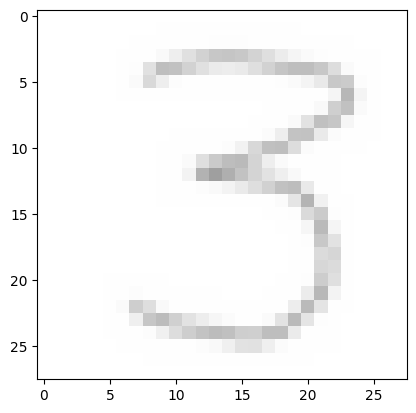

In [190]:
from skimage.transform import resize

im = resize(im, (img_rows, img_cols))
plt.imshow(im)
plt.show()

Let's grayscale the image and make it a bit darker.

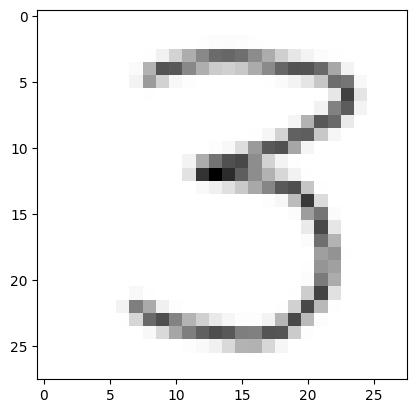

In [191]:
gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])

plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

Reshape the output to make sure it is the right shape to go into our model to classify.

In [192]:
# reshape the image
gray = gray.reshape(1, img_rows, img_cols, 1)

# normalize image
# gray /= 255
# print(gray)
# print(img_cols, img_rows)

Previously we saved the model as test_model.h5. We now read it back in an use it to infer.

This is done using the predict function on the model using our grey-scale image.

In [193]:
# load the model
from tensorflow.keras.models import load_model
model = load_model("test_model.h5")

# predict digit
prediction = model.predict(gray)
print(prediction.argmax())

1/1 [==============================] - 0s 173ms/step
8


To see this in action live, go to [MNIST-Draw](https://mco-mnist-draw-rwpxka3zaa-ue.a.run.app/)